## Web scrape PAOK FC website  

<img src="paok_badge.png" width="256" height="256">


## Webscraping  player stats for season 2024-2025

In [2]:
import pandas as pd
import numpy as np
import requests
# from tqdm import tqdm
from time import sleep
import re
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.set_option('display.max_columns', None)


In [3]:
basic_url = "https://www.paokfc.gr/a-omada/a-omada/a-team-roster/"

In [4]:
headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.199 Safari/537.36"}

In [5]:
response = requests.get(basic_url,headers=headers)

In [6]:
response.status_code

200

In [7]:
soup = BeautifulSoup(response.content, 'html.parser')

## Finding all the players' urls

In [8]:
squad_soup = soup.find('article', {'class': "main-section teamplayers-category"}).\
                find('div',{'class': "row the-content teamplayers-category-content"}).\
                findAll('section', {'class' : "col-lg-12 teamplayers-section teamplayers-goalkeepers"})
              

squad_tags=[] 
for url in squad_soup:
    squad_tags.append(url.find_all('a')) #its length is 4(each position category)
    
# Initialize an empty list to store the URLs
squad_urls = []

# Iterate over each category
for category in squad_tags:
    # Iterate over each <a> tag in the category
    for a_tag in category:
        # Check if the tag has an 'href' attribute and it's not '#'
        if a_tag.has_attr('href') and a_tag['href'] != '#':
            squad_urls.append(a_tag['href']+"?template=stats")

squad_urls


['https://www.paokfc.gr/profiles/jiri-pavlenka-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/dimitrios-monastirlis-2/?template=stats',
 'https://www.paokfc.gr/profiles/dominik-kotarski-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/konstantinos-mpalomenos-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/antonis-tsiftsis-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/giannis-michailidis/?template=stats',
 'https://www.paokfc.gr/profiles/dejan-lovren-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/omar-colley-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/tomasz-kedziora/?template=stats',
 'https://www.paokfc.gr/profiles/jonathan-g%ce%bfmez-a-team/?template=stats',
 'https://www.paokfc.gr/profiles/jonny-castro-otto/?template=stats',
 'https://www.paokfc.gr/profiles/abdul-rahman-baba/?template=stats',
 'https://www.paokfc.gr/profiles/joan-sastre-vanrell/?template=stats',
 'https://www.paokfc.gr/profiles/konstantinos-thymianis

## Finding stats for an individual player

In [9]:
test_url = "https://www.paokfc.gr/profiles/tomasz-kedziora/?template=stats"
test_response = requests.get(test_url, headers=headers)
test_soup = BeautifulSoup(test_response.content, 'html.parser')

In [10]:
# Name of the player

name = test_soup.find('div', {'class': "row the-content single-profile-content"}).\
        find('section', {'class': "col-sm-12 single-profile-header"}).\
        find('h1').text
name

'Tomasz Kedziora'

In [11]:
stats = test_soup.findAll('section', {'class':"statistics-section"})
        

row_stats = []
for stat in stats[:6]:
#Until 6th 'cause the rest of the list contains the stats for mobile and tablet version
    row_stats.append(stat.findAll('section',{'class': "row stats"}))

In [12]:
row_stats


[[<section class="row stats">
  <div class="col-sm-6">
  <h2>Εμφανίσεις</h2>
  <div class="numerical large">25</div>
  </div>
  <div class="col-sm-6">
  <h2>Λεπτά συμμετοχής</h2>
  <div class="numerical large">2456'</div>
  </div>
  </section>],
 [<section class="row stats">
  <h2>Γκολ</h2>
  <div class="numerical large">0</div>
  </section>,
  <section class="row stats">
  <div class="col-sm-6">
  <h2>Σουτ</h2>
  <div class="circular">
  <div class="circlestat" data-bgcolor="#cfcfcf" data-bordersize="15" data-dimension="180" data-fgcolor="#ff6d00" data-fontsize="38" data-percent="50">
  <div class="total">4</div>
  </div>
  <div class="legend orange">
  <span>Εντός Περιοχής</span>
  <span class="numerical small">2</span>
  </div>
  <div class="legend">
  <span>Εκτός Περιοχής</span>
  <span class="numerical small">2</span>
  </div>
  </div>
  </div>
  <div class="col-sm-6">
  <h2>Γκολ / Τελική προσπάθεια</h2>
  <div class="circular">
  <div class="circlestat" data-bgcolor="#cfcfcf" dat

In [13]:
stats_titles = []

for stat in row_stats:
    for element in stat:
        h2_tags = element.find_all('h2')
        for h2_tag in h2_tags:
            if h2_tag.text:
                stats_titles.append(h2_tag.text)

            


In [14]:
stats_titles

['Εμφανίσεις',
 'Λεπτά συμμετοχής',
 'Γκολ',
 'Σουτ',
 'Γκολ / Τελική προσπάθεια',
 'Δοκάρια',
 'Χαμένες Ευκαιρίες',
 'Πάσες',
 'Ασίστ',
 'Γεμίσματα',
 'Εύστοχα Γεμίσματα',
 'Κλεψίματα',
 'Επεμβάσεις',
 'Κίτρινες',
 'Κόκκινες']

In [15]:
# all the stat numbers except fouls
stats_numbers = []
for stat in row_stats:
    for element in stat:
        div_tags = element.find_all('div', class_= lambda x: ('numerical' in x) or ('total' in x))
        for div_tag in div_tags:
            stats_numbers.append(div_tag.text)
stats_numbers.pop(-3)

'20'

In [16]:
stats_numbers

['25',
 "2456'",
 '0',
 '4',
 '0/93',
 '0',
 '0',
 '634',
 '0',
 '6',
 '3',
 '68',
 '42',
 '2',
 '0']

In [17]:
temp=dict(zip(stats_titles,stats_numbers))
temp

{'Εμφανίσεις': '25',
 'Λεπτά συμμετοχής': "2456'",
 'Γκολ': '0',
 'Σουτ': '4',
 'Γκολ / Τελική προσπάθεια': '0/93',
 'Δοκάρια': '0',
 'Χαμένες Ευκαιρίες': '0',
 'Πάσες': '634',
 'Ασίστ': '0',
 'Γεμίσματα': '6',
 'Εύστοχα Γεμίσματα': '3',
 'Κλεψίματα': '68',
 'Επεμβάσεις': '42',
 'Κίτρινες': '2',
 'Κόκκινες': '0'}

In [18]:
#Fouls
fouls = test_soup.findAll('div', {'class': "circular"})
foul_stats = fouls[8].find_all('div', class_ = lambda x: x and ('total' in x) or ('legend' in x))

total_fouls = int(foul_stats[0].text)
fouls_drawn = int(foul_stats[1].find('span',{'class':"numerical small"}).text)
fouls_committed =total_fouls-fouls_drawn

temp.update({
    'Συνολικά Φάουλ':total_fouls,
    'Φάουλ Υπέρ':fouls_drawn,
    'Φάουλ Κατά':fouls_committed
})

temp

{'Εμφανίσεις': '25',
 'Λεπτά συμμετοχής': "2456'",
 'Γκολ': '0',
 'Σουτ': '4',
 'Γκολ / Τελική προσπάθεια': '0/93',
 'Δοκάρια': '0',
 'Χαμένες Ευκαιρίες': '0',
 'Πάσες': '634',
 'Ασίστ': '0',
 'Γεμίσματα': '6',
 'Εύστοχα Γεμίσματα': '3',
 'Κλεψίματα': '68',
 'Επεμβάσεις': '42',
 'Κίτρινες': '2',
 'Κόκκινες': '0',
 'Συνολικά Φάουλ': 20,
 'Φάουλ Υπέρ': 8,
 'Φάουλ Κατά': 12}

## Finding the stats for all players

In [19]:
df = pd.DataFrame()
for url in (squad_urls):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    #name of each player
    name = soup.find('div', {'class': "row the-content single-profile-content"}).\
        find('section', {'class': "col-sm-12 single-profile-header"}).\
        find('h1').text
    
    stats = soup.findAll('section', {'class':"statistics-section"})
        
    #list with names of each stat
    row_stats = []
    for stat in stats[:6]:
    #Until 6th 'cause the rest of the list contains the stats for mobile and tablet version
        row_stats.append(stat.findAll('section',{'class': "row stats"}))
        
    stats_titles = []
    
    #list with the numbers for each stat
    for stat in row_stats:
        for element in stat:
            h2_tags = element.find_all('h2')
            for h2_tag in h2_tags:
                if h2_tag.text:
                    stats_titles.append(h2_tag.text)
                    
    # all the stat numbers except fouls
    stats_numbers = []
    for stat in row_stats:
        for element in stat:
            div_tags = element.find_all('div', class_= lambda x: ('numerical' in x) or ('total' in x))
            for div_tag in div_tags:
                stats_numbers.append(div_tag.text)
    stats_numbers.pop(-3) # exclude foul number
    
    #Fouls
    fouls = soup.findAll('div', {'class': "circular"})
    foul_stats = fouls[8].find_all('div', class_ = lambda x: x and ('total' in x) or ('legend' in x))

    total_fouls = int(foul_stats[0].text)
    fouls_drawn = int(foul_stats[1].find('span',{'class':"numerical small"}).text)
    fouls_committed =total_fouls-fouls_drawn

    # Creating a dict with the stats for each player to concat it in the df
    temp={
        'Όνομα':name
    }
    
    temp.update(dict(zip(stats_titles,stats_numbers)))
    
    temp.update({
        'Συνολικά Φάουλ':total_fouls,
        'Φάουλ Υπέρ':fouls_drawn,
        'Φάουλ Κατά':fouls_committed
        })
    
    
    # Filling the dataframe with the stats of the players
    df = pd.concat([df, pd.DataFrame([temp])], axis=0, ignore_index=True)
    
    sleep(1.5) #use sleep to avoid overwhelming the server

In [20]:
df.head()

,Όνομα,Εμφανίσεις,Λεπτά συμμετοχής,Γκολ,Σουτ,Γκολ / Τελική προσπάθεια,Δοκάρια,Χαμένες Ευκαιρίες,Πάσες,Ασίστ,Γεμίσματα,Εύστοχα Γεμίσματα,Κλεψίματα,Επεμβάσεις,Κίτρινες,Κόκκινες,Συνολικά Φάουλ,Φάουλ Υπέρ,Φάουλ Κατά,Αποκρούσεις
0,Jiri Pavlenka,2,180',0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,Δημήτριος Μοναστηρλής,0,0',0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,Dominik Kotarski,28,2756',0,0,0/0,0,0,5,0,1,0,35,18,1,0,3,3,0,80
3,Κωνσταντίνος Μπαλωμένος,0,0',0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,Αντώνης Τσιφτσής,1,96',0,0,0/0,0,0,0,0,0,0,1,2,0,0,0,0,0,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Όνομα                     29 non-null     object
 1   Εμφανίσεις                29 non-null     object
 2   Λεπτά συμμετοχής          29 non-null     object
 3   Γκολ                      29 non-null     object
 4   Σουτ                      29 non-null     object
 5   Γκολ / Τελική προσπάθεια  29 non-null     object
 6   Δοκάρια                   29 non-null     object
 7   Χαμένες Ευκαιρίες         29 non-null     object
 8   Πάσες                     29 non-null     object
 9   Ασίστ                     29 non-null     object
 10  Γεμίσματα                 29 non-null     object
 11  Εύστοχα Γεμίσματα         29 non-null     object
 12  Κλεψίματα                 29 non-null     object
 13  Επεμβάσεις                29 non-null     object
 14  Κίτρινες                  29

In [22]:
#creating a copy of the df and convert values to int
df2 = df.astype(dtype='int64', errors='ignore').copy()

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Όνομα                     29 non-null     object
 1   Εμφανίσεις                29 non-null     int64 
 2   Λεπτά συμμετοχής          29 non-null     object
 3   Γκολ                      29 non-null     int64 
 4   Σουτ                      29 non-null     int64 
 5   Γκολ / Τελική προσπάθεια  29 non-null     object
 6   Δοκάρια                   29 non-null     int64 
 7   Χαμένες Ευκαιρίες         29 non-null     int64 
 8   Πάσες                     29 non-null     int64 
 9   Ασίστ                     29 non-null     int64 
 10  Γεμίσματα                 29 non-null     int64 
 11  Εύστοχα Γεμίσματα         29 non-null     int64 
 12  Κλεψίματα                 29 non-null     int64 
 13  Επεμβάσεις                29 non-null     int64 
 14  Κίτρινες                  29

In [24]:
#Converting minutes played by each player to int
df2['Λεπτά συμμετοχής']  = df2['Λεπτά συμμετοχής'].str.findall(r"\d+").str[0].astype(int)

In [46]:
# Top 10 scorers

top10_scorers =df2.sort_values(by='Γκολ', ascending = False)[['Όνομα', 'Γκολ']].head(10)

top10_scorers

,Όνομα,Γκολ
11,Abdul Rahman Baba,7
28,Kiril Despodov,7
25,Tarik Tissoudali,6
23,Taison Barcellos Freda,6
24,Andrija Zivkovic,6
14,Mady Camara,5
19,Stefan Schwab,4
22,Fedor Chalov,4
17,Thomas Murg,3
21,Shola Shoretire,3


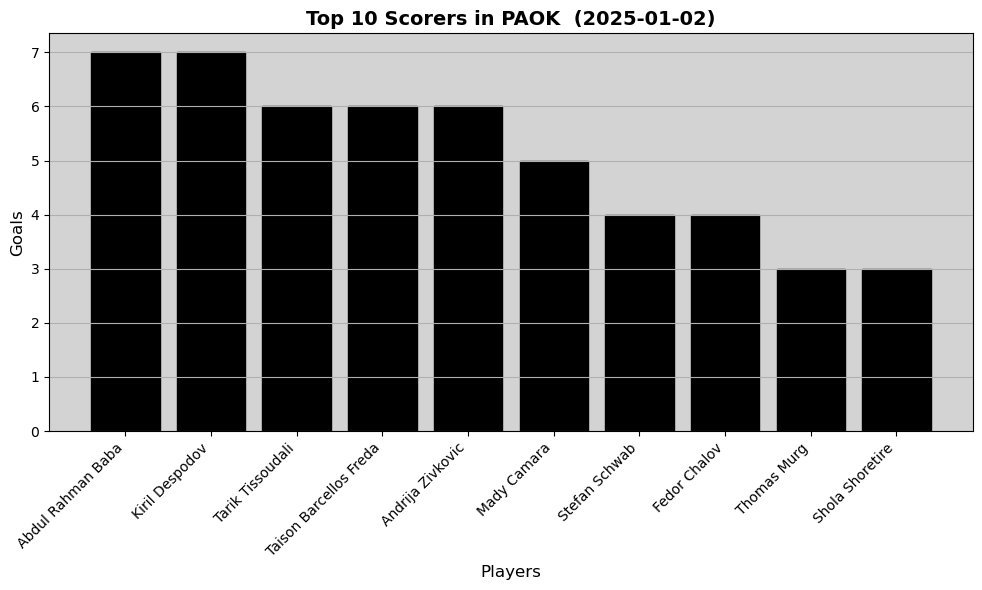

In [47]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(
    top10_scorers["Όνομα"], 
    top10_scorers["Γκολ"], 
    color="black",  
    edgecolor="black" 
)

# Adding Titles and Labels
plt.title(f"Top 10 Scorers in PAOK  ({datetime.today().strftime('%Y-%m-%d')})", \
          fontsize=14, fontweight='bold', color="black")
plt.xlabel("Players", fontsize=12, color="black")
plt.ylabel("Goals", fontsize=12, color="black")
plt.xticks(rotation=45, ha='right', fontsize=10, color="black")
plt.grid(axis='y')
plt.tight_layout()


plt.gca().set_facecolor("lightgray")  
plt.show()

In [27]:
df2['Τελική προσπάθεια'] = df2['Γκολ / Τελική προσπάθεια'].str.split('/',expand=True)[1]

In [28]:
df2['Τελική προσπάθεια'] = pd.to_numeric(df2['Τελική προσπάθεια'])

In [29]:
df2['Ποσοστό ευστοχίας'] = round(df2['Γκολ']/ df2['Τελική προσπάθεια']*100,2)

In [30]:
print('Top 10 players based on accuracy')
top10_acc = df2.sort_values(by='Ποσοστό ευστοχίας',ascending=False).\
            head(10)[['Όνομα','Γκολ','Τελική προσπάθεια','Ποσοστό ευστοχίας']].reset_index(drop=True)
top10_acc

Top 10 players based on accuracy


,Όνομα,Γκολ,Τελική προσπάθεια,Ποσοστό ευστοχίας
0,Shola Shoretire,3,5,60.00
1,Abdul Rahman Baba,7,20,35.00
2,Tarik Tissoudali,6,18,33.33
3,Kiril Despodov,7,31,22.58
4,Brandon Thomas Llamas,2,10,20.00
5,Mady Camara,5,27,18.52
6,Taison Barcellos Freda,6,35,17.14
7,Andrija Zivkovic,6,37,16.22
8,Stefan Schwab,4,27,14.81
9,Fedor Chalov,4,28,14.29


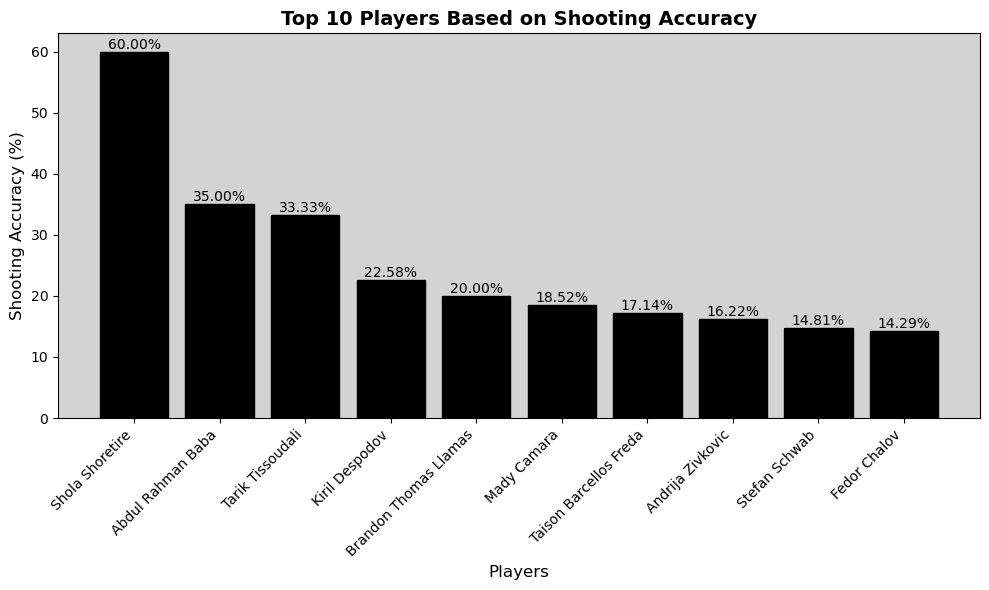

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(
    top10_acc["Όνομα"], 
    top10_acc["Ποσοστό ευστοχίας"], 
    color="black", 
    edgecolor="black" 
)

# Adding annotations on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10, color="black")

# Adding Titles and Labels
plt.title("Top 10 Players Based on Shooting Accuracy", fontsize=14, fontweight='bold', color="black")
plt.xlabel("Players", fontsize=12, color="black")
plt.ylabel("Shooting Accuracy (%)", fontsize=12, color="black")
plt.xticks(rotation=45, ha='right', fontsize=10, color="black")  
plt.tight_layout()

# Dark background to match the theme
plt.gca().set_facecolor("lightgray") 
plt.show()

In [48]:
most_shoots = df2.sort_values(by='Τελική προσπάθεια',ascending=False). \
head()[['Όνομα','Τελική προσπάθεια','Ποσοστό ευστοχίας']]

most_shoots

,Όνομα,Τελική προσπάθεια,Ποσοστό ευστοχίας
8,Tomasz Kedziora,93,0.00
15,Γιάννης Κωνσταντέλιας,49,6.12
24,Andrija Zivkovic,37,16.22
23,Taison Barcellos Freda,35,17.14
28,Kiril Despodov,31,22.58


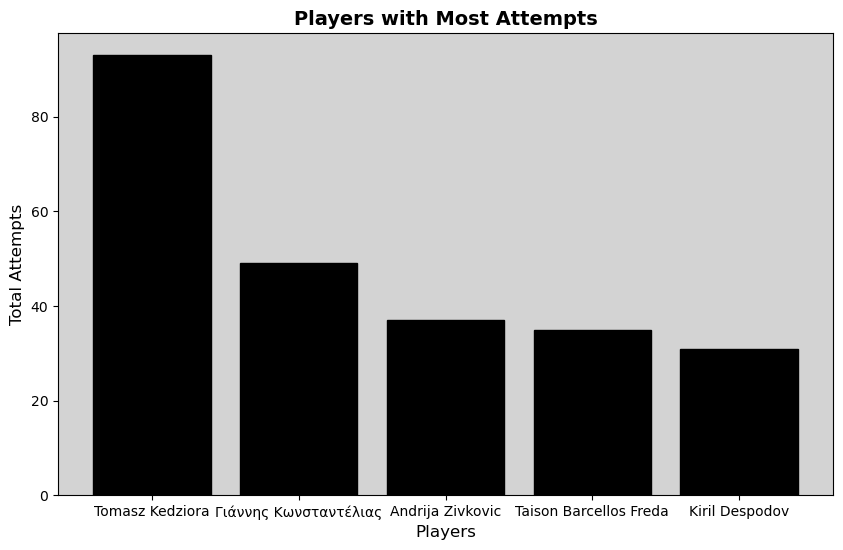

In [33]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(
    most_shoots["Όνομα"], 
    most_shoots["Τελική προσπάθεια"], 
    color="black", 
    edgecolor="black" 
)

# Adding Titles and Labels
plt.title("Players with Most Attempts", fontsize=14, fontweight='bold', color="black")
plt.xlabel("Players", fontsize=12, color="black")
plt.ylabel("Total Attempts", fontsize=12, color="black")
plt.xticks(range(len(most_shoots["Όνομα"])))

# Adjust layout for better visibility
plt.gca().set_facecolor("lightgray") 
plt.show()

### Possible error in data gathering of Tomas Kedziora

In [34]:
df2.head(5)

,Όνομα,Εμφανίσεις,Λεπτά συμμετοχής,Γκολ,Σουτ,Γκολ / Τελική προσπάθεια,Δοκάρια,Χαμένες Ευκαιρίες,Πάσες,Ασίστ,Γεμίσματα,Εύστοχα Γεμίσματα,Κλεψίματα,Επεμβάσεις,Κίτρινες,Κόκκινες,Συνολικά Φάουλ,Φάουλ Υπέρ,Φάουλ Κατά,Αποκρούσεις,Τελική προσπάθεια,Ποσοστό ευστοχίας
0,Jiri Pavlenka,2,180,0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN
1,Δημήτριος Μοναστηρλής,0,0,0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN
2,Dominik Kotarski,28,2756,0,0,0/0,0,0,5,0,1,0,35,18,1,0,3,3,0,80,0,NaN
3,Κωνσταντίνος Μπαλωμένος,0,0,0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN
4,Αντώνης Τσιφτσής,1,96,0,0,0/0,0,0,0,0,0,0,1,2,0,0,0,0,0,2,0,NaN


In [35]:
most_assists = df2.sort_values(by="Ασίστ",ascending=False)[['Όνομα','Ασίστ']].reset_index(drop=True).head(10)
most_assists

,Όνομα,Ασίστ
0,Kiril Despodov,7
1,Andrija Zivkovic,7
2,Fedor Chalov,3
3,Jonny Castro Otto,3
4,Joan Sastre Vanrell,2
5,Mady Camara,2
6,Thomas Murg,2
7,Stefan Schwab,2
8,Adelino André Vieirinha,2
9,Γιάννης Κωνσταντέλιας,1


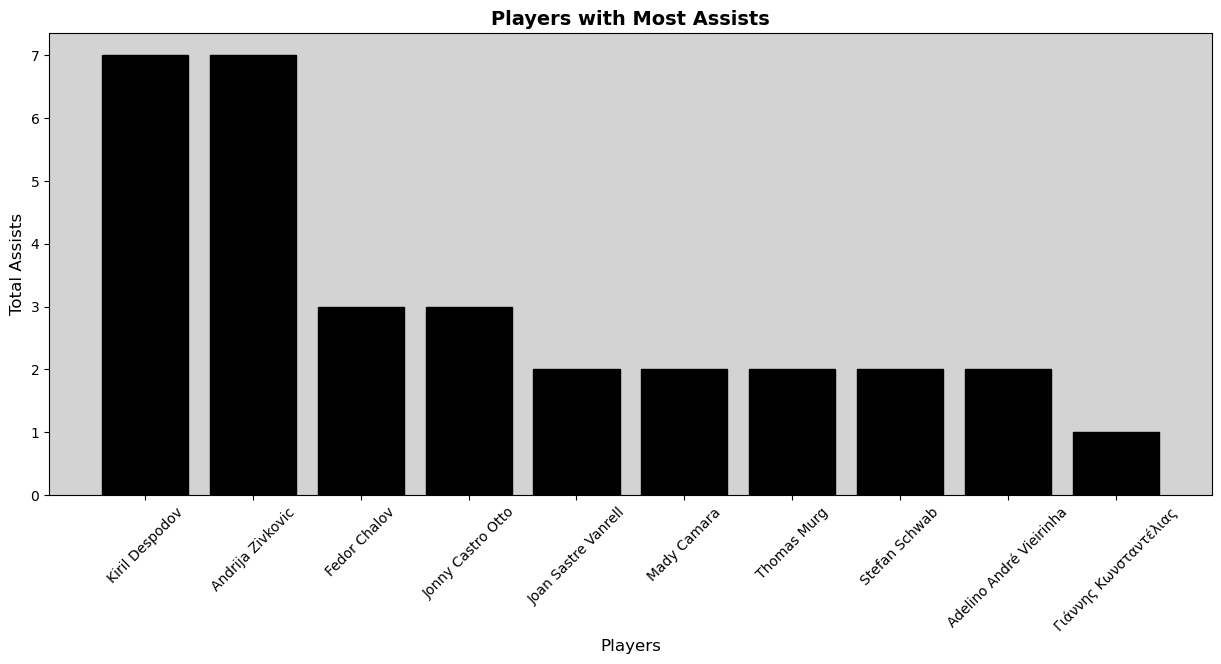

In [36]:
# Plotting
plt.figure(figsize=(15, 6))
bars = plt.bar(
    most_assists["Όνομα"], 
    most_assists["Ασίστ"], 
    color="black", 
    edgecolor="black"
)

# Adding Titles and Labels
plt.title("Players with Most Assists", fontsize=14, fontweight='bold', color="black")
plt.xlabel("Players", fontsize=12, color="black")
plt.ylabel("Total Assists", fontsize=12, color="black")
plt.xticks(rotation=45)


# Adjust layout for better visibility
plt.gca().set_facecolor("lightgray") 
plt.show()

In [37]:
df2['ΜΟ Λεπτών/Παιχνίδι'] = df2['Λεπτά συμμετοχής']/df2['Εμφανίσεις']

In [38]:
most_min_played = df2.sort_values(by='Λεπτά συμμετοχής',ascending=False).\
                        head(10)[['Όνομα','Λεπτά συμμετοχής','ΜΟ Λεπτών/Παιχνίδι']].reset_index(drop=True)
most_min_played

,Όνομα,Λεπτά συμμετοχής,ΜΟ Λεπτών/Παιχνίδι
0,Dominik Kotarski,2756,98.428571
1,Tomasz Kedziora,2456,98.240000
2,Abdul Rahman Baba,2109,84.360000
3,Andrija Zivkovic,2100,72.413793
4,Magomed Ozdoev,2006,77.153846
5,Γιάννης Κωνσταντέλιας,1954,69.785714
6,Mady Camara,1857,61.900000
7,Jonny Castro Otto,1779,84.714286
8,Stefan Schwab,1767,60.931034
9,Taison Barcellos Freda,1720,71.666667


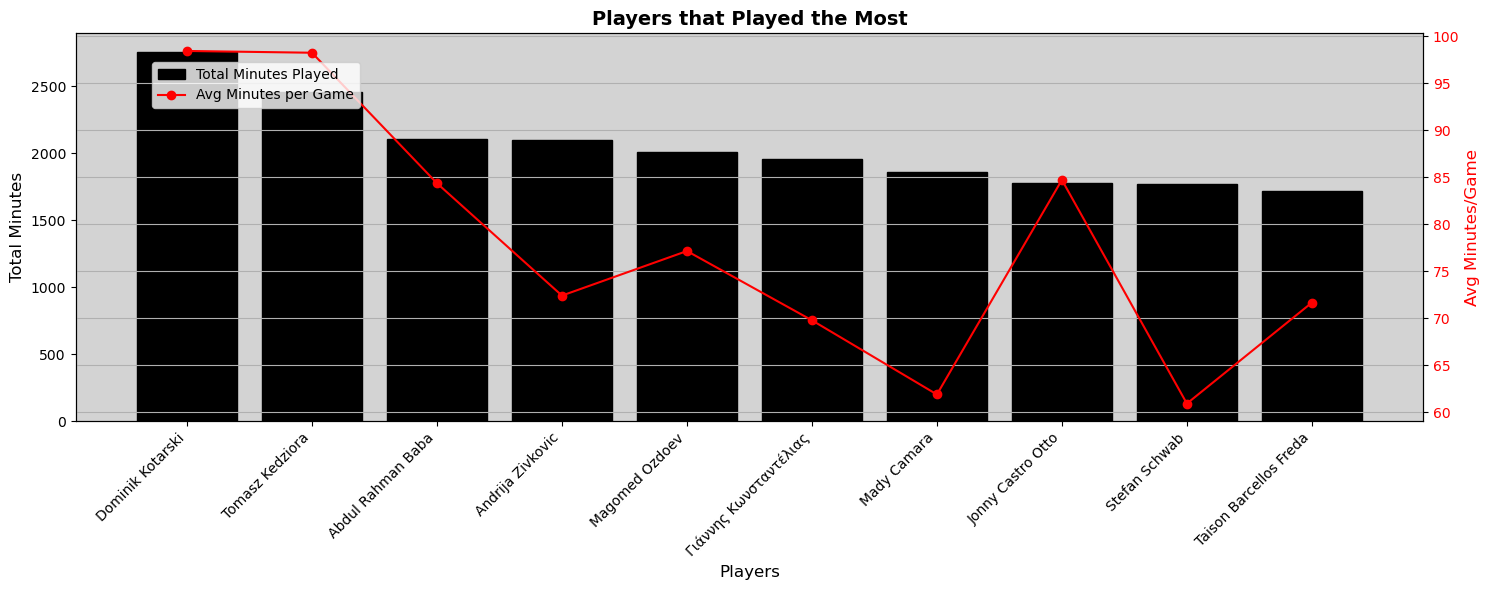

In [39]:
# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot for total minutes played
bars = ax1.bar(
    most_min_played["Όνομα"], 
    most_min_played["Λεπτά συμμετοχής"], 
    color="black", 
    edgecolor="black", 
    label="Total Minutes Played"
)

# Add labels and customize the first y-axis
ax1.set_title("Players that Played the Most", fontsize=14, fontweight="bold", color="black")
ax1.set_xlabel("Players", fontsize=12, color="black")
ax1.set_ylabel("Total Minutes", fontsize=12, color="black")
ax1.set_xticks(range(len(most_min_played["Όνομα"])))
ax1.set_xticklabels(most_min_played["Όνομα"], rotation=45, ha="right", fontsize=10)
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_facecolor("lightgray")

# Secondary y-axis for average minutes per game
ax2 = ax1.twinx()
ax2.plot(
    most_min_played["Όνομα"], 
    most_min_played["ΜΟ Λεπτών/Παιχνίδι"], 
    color="red", 
    marker="o", 
    label="Avg Minutes per Game"
)
ax2.set_ylabel("Avg Minutes/Game", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Adjust layout
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()


In [40]:
df2.head(2)

,Όνομα,Εμφανίσεις,Λεπτά συμμετοχής,Γκολ,Σουτ,Γκολ / Τελική προσπάθεια,Δοκάρια,Χαμένες Ευκαιρίες,Πάσες,Ασίστ,Γεμίσματα,Εύστοχα Γεμίσματα,Κλεψίματα,Επεμβάσεις,Κίτρινες,Κόκκινες,Συνολικά Φάουλ,Φάουλ Υπέρ,Φάουλ Κατά,Αποκρούσεις,Τελική προσπάθεια,Ποσοστό ευστοχίας,ΜΟ Λεπτών/Παιχνίδι
0,Jiri Pavlenka,2,180,0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,90.0
1,Δημήτριος Μοναστηρλής,0,0,0,0,0/0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN


In [41]:
most_steals = df2.sort_values(by='Κλεψίματα',ascending=False)[['Όνομα','Κλεψίματα','Κίτρινες']].\
                head(10).reset_index(drop=True)
most_steals

,Όνομα,Κλεψίματα,Κίτρινες
0,Magomed Ozdoev,103,5
1,Jonny Castro Otto,79,2
2,Abdul Rahman Baba,69,5
3,Tomasz Kedziora,68,2
4,Mady Camara,56,9
5,Andrija Zivkovic,55,3
6,Taison Barcellos Freda,45,1
7,Stefan Schwab,43,3
8,Γιάννης Κωνσταντέλιας,39,2
9,Joan Sastre Vanrell,35,3


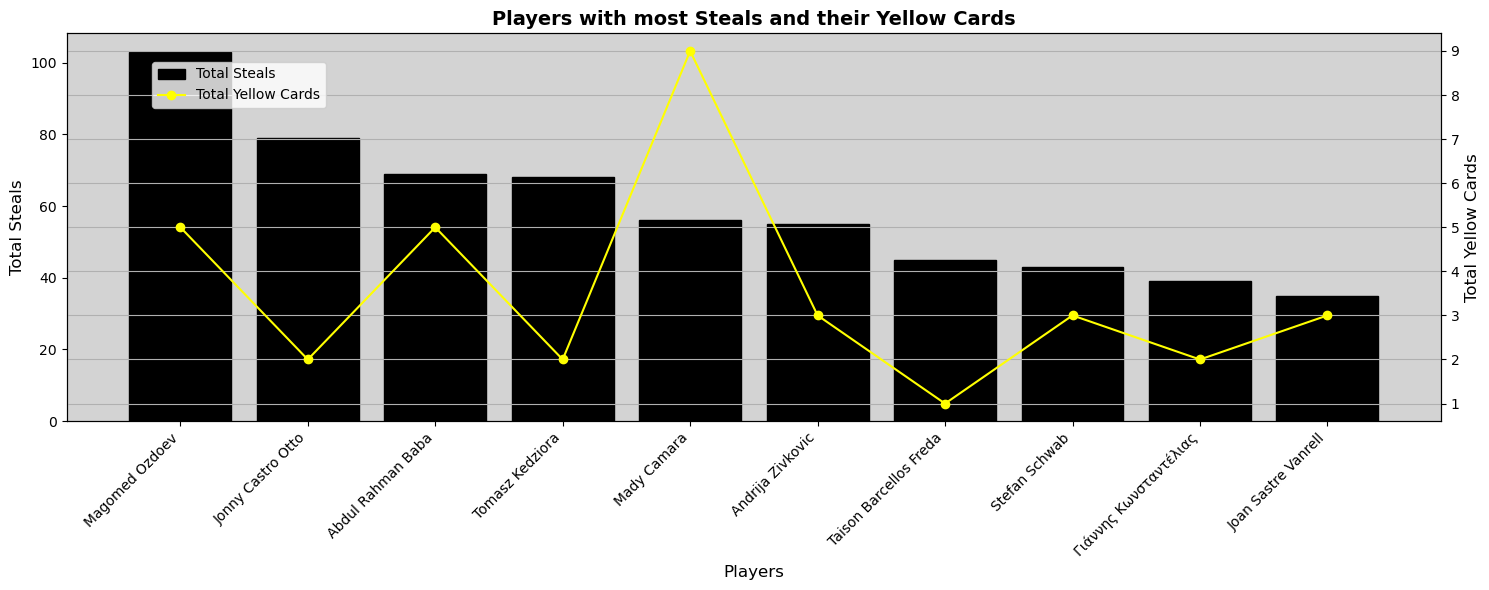

In [42]:
# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bar plot for total steals
bars = ax1.bar(
    most_steals["Όνομα"], 
    most_steals["Κλεψίματα"], 
    color="black", 
    edgecolor="black", 
    label="Total Steals"
)

# Add labels and customize the first y-axis
ax1.set_title("Players with most Steals and their Yellow Cards", fontsize=14, fontweight="bold", color="black")
ax1.set_xlabel("Players", fontsize=12, color="black")
ax1.set_ylabel("Total Steals", fontsize=12, color="black")
ax1.set_xticks(range(len(most_steals["Όνομα"])))
ax1.set_xticklabels(most_steals["Όνομα"], rotation=45, ha="right", fontsize=10)
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_facecolor("lightgray")

# Secondary y-axis for average minutes per game
ax2 = ax1.twinx()
ax2.plot(
    most_steals["Όνομα"], 
    most_steals["Κίτρινες"], 
    color="yellow", 
    marker="o", 
    label="Total Yellow Cards"
)
ax2.set_ylabel("Total Yellow Cards", fontsize=12, color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Adding legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Adjust layout
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()


In [43]:
path = r"C:\Users\Vasilis\Desktop\Github\PAOK Web scraping\2. Data\paok_stats.csv"
path2= r"C:\Users\Vasilis\Desktop\Github\PAOK Web scraping\2. Data\paok_stats.xlsx"
df2.to_csv(path,index=False)
df2.to_excel(path2, index=False)